## Лабораторная работа 2.1.
## Опыт Франка-Герца.

** Задание: **

Методом электронного возбуждения измеряется энергия первого уровня атома гелия в динамическом и статическом режимах.

Получение вольт-амперной характеристики $I_к=f(V_a)$ на экране осциллографа (дин. режим) и в статическом режиме измерений.

$I_к$ - ток на коллекторе

$V_a$ - напряжение на аноде (ускоряющее напряжение между анодом и катодом)

 <center> ** Динамический режим ** </center> 

* При макс. ускоряющем напряжении измерим на экране осциллографа расстояния между максимумами и минимумами осциллограммы. Проведем измерения при 3-х значениях задерж. напряжения (4, 6 и 8 В).

In [7]:
U=[4, 6, 8]
dmin=[3.8, 3.9, 3.8]
dmax=[3.3, 3.3, 3.3]

* По расстоянию между соседними максимумами на осциллограммах определим энергию возбуждения первого уровня атома гелия (в эВ).

$E_{возб}=e \Delta U_{max}$

In [46]:
import numpy as np
E_by_min=5*sum(dmin)/3    #в эВ
E_by_max=5*sum(dmax)/3 
E_mean=(E_by_min+E_by_max)/2

err_E=np.sqrt(((E_by_min-E_mean)**2+(E_by_max-E_mean)**2)/1)

# Для динамического метода
print(r'  E = ({0:.1f} ± {1:.1f}) эВ'.format(E_mean, err_E))

  E = (17.8 ± 1.9) эВ


<center> ** Статический режим ** </center> 

* Снимем зависимость коллекторного тока от анодного напряжения для 3-х различных значений задерживающего напряжения $V_2$ = 4, 6, 8 В.

In [9]:
I1=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 34, 21, 28, 35, 43, 55, 59, 55, 51, 53, 60, 70, 75, 79, 80, 82, 84, 92]
V1=[0, 3.21, 4.97, 6.35, 8.20, 10.34, 12.50, 14.73, 16.96, 19.13, 22.51, 24.40, 27.45, 29.31, 31.10, 34.28, 40.19, 41.81, 44.34, 48.89, 52.55, 56.39, 59.05, 63.65, 67.30, 69.41, 71.93, 77.94]

I2=[0, 2, 7, 15, 19, 27, 33, 37, 40, 36, 29, 12, 9, 18, 26, 32, 43, 47, 45, 41, 35, 33, 34, 39, 44, 48, 52, 53, 52, 52, 55]
V2=[0, 4.62, 6.42, 8.78, 10.07, 13.17, 15.56, 17.38, 20.54, 21.85, 23.22, 25.01, 26.98, 29.39, 31.13, 32.65, 35.45, 38.80, 40.12, 42.36, 45.72, 47.83, 50.39, 53.73, 56.16, 58.32, 61.51, 63.19, 66.02, 71.08, 77.46]

I3=[1.5, 4, 6, 13, 17, 21, 26, 32.5, 34, 36, 36, 35, 32, 29, 23, 20, 12, 4, 1, 2, 4, 17, 19, 24, 31, 33.5, 32.5, 28.5, 27, 25, 19, 17, 21, 28, 29, 28, 26, 24.5]
V3=[6.97, 7.84, 8.66, 10.65, 11.96, 13.13, 15.12, 17.88, 18.5, 19.9, 20.66, 21.22, 22.61, 23.39, 24.48, 24.79, 25.37, 26.12, 28.43, 28.95, 29.70, 32.92, 33.35, 34.58, 36.65, 38.38, 40.05, 42.76, 43.9, 45.07, 48.08, 51.69, 55.32, 61.18, 64.13, 66.56, 70.18, 78.22]

* Построим графики $I_к=f(V_a)$ при $V_2=const$. 

* По графикам определим энергию возбуждения первого уровня атома гелия. Оценим ошибку измерения. Сравним результаты измерений, полученные при динамическом и статическом методах измерений

In [13]:
from scipy.interpolate import CubicSpline

In [15]:
# U=4В
cs = CubicSpline(V1, I1)
cs_deriv_roots = cs.derivative().roots()

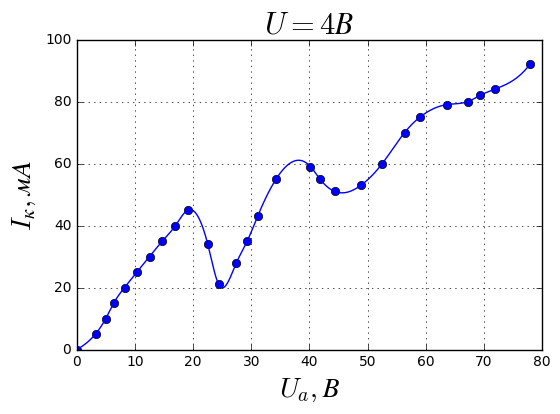

In [17]:
V_spline = np.linspace(V1[0], V1[-1], 1000)
plt.plot(V1,I1, 'bo', V_spline, cs(V_spline), 'b-')
plt.xlabel('$U_a, В$',size=20)
plt.ylabel('$I_к, мА$',size=20)
plt.title('$U=4 В$', size=22)

#Легенда
#plt.text(0.7,1600,'T=30 C',size=14)

plt.grid()
plt.show()

In [18]:
cs_deriv_roots

array([ 19.47228405,  25.03829108,  38.14158641,  45.61709829])

In [23]:
E=[]
errors_E=[]
# между макс
E_by_max=cs_deriv_roots[2]-cs_deriv_roots[0]
# между мин
E_by_min=cs_deriv_roots[3]-cs_deriv_roots[1]
E_mean=(E_by_min+E_by_max)/2

In [24]:
E.append(E_mean)
err_E=np.sqrt(((E_by_min-E_mean)**2+(E_by_max-E_mean)**2)/1)
errors_E.append(err_E)

In [26]:
errors_E, E

([1.3502238290724486], [19.624054782756737])

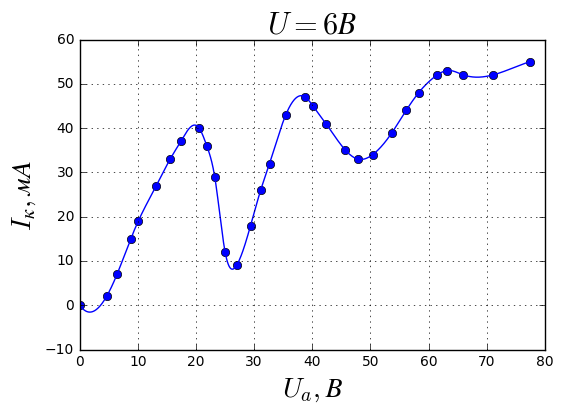

In [28]:
# U=6В
cs = CubicSpline(V2, I2)
cs_deriv_roots = cs.derivative().roots()

V_spline = np.linspace(V2[0], V2[-1], 1000)
plt.plot(V2,I2, 'bo', V_spline, cs(V_spline), 'b-')
plt.xlabel('$U_a, В$',size=20)
plt.ylabel('$I_к, мА$',size=20)
plt.title('$U=6 В$', size=22)

#Легенда
#plt.text(0.7,1600,'T=30 C',size=14)

plt.grid()
plt.show()

In [29]:
cs_deriv_roots

array([  1.7297984 ,  19.76491641,  26.246478  ,  38.10491765,
        48.35684461,  63.45709253,  68.37973479,  81.08123517])

In [31]:
# между макс
E_by_max=cs_deriv_roots[3]-cs_deriv_roots[1]
# между мин
E_by_min=cs_deriv_roots[4]-cs_deriv_roots[2]
# между макс
E_by_max2=cs_deriv_roots[5]-cs_deriv_roots[3]
# между мин
E_by_min2=cs_deriv_roots[6]-cs_deriv_roots[4]

E_mean=(E_by_min+E_by_max+E_by_min2+E_by_max2)/4

E.append(E_mean)
err_E=np.sqrt(((E_by_min-E_mean)**2+(E_by_max-E_mean)**2+(E_by_min2-E_mean)**2+(E_by_max2-E_mean)**2)/3)
errors_E.append(err_E)

[1.3502238290724486, 3.0205753279126339, 3.0205753279126339]

In [33]:
print(E, errors_E)

[19.624054782756737, 21.456358228948339] [1.3502238290724486, 3.0205753279126339]


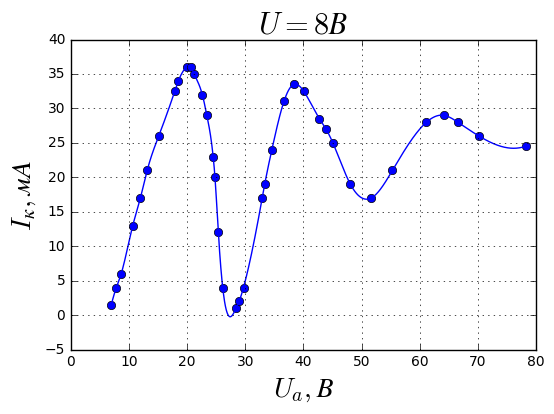

In [34]:
# U=8В
cs = CubicSpline(V3, I3)
cs_deriv_roots = cs.derivative().roots()

V_spline = np.linspace(V3[0], V3[-1], 1000)
plt.plot(V3,I3, 'bo', V_spline, cs(V_spline), 'b-')
plt.xlabel('$U_a, В$',size=20)
plt.ylabel('$I_к, мА$',size=20)
plt.title('$U=8 В$', size=22)

#Легенда
#plt.text(0.7,1600,'T=30 C',size=14)

plt.grid()
plt.show()

In [35]:
cs_deriv_roots

array([ 20.31884828,  27.40486625,  38.6052399 ,  50.86966583,
        63.77846551,  76.17603832])

In [36]:
# между макс
E_by_max=cs_deriv_roots[2]-cs_deriv_roots[0]
# между мин
E_by_min=cs_deriv_roots[3]-cs_deriv_roots[1]
# между макс
E_by_max2=cs_deriv_roots[4]-cs_deriv_roots[2]

E_mean=(E_by_min+E_by_max+E_by_max2)/3

E.append(E_mean)
err_E=np.sqrt(((E_by_min-E_mean)**2+(E_by_max-E_mean)**2+(E_by_max2-E_mean)**2)/2)
errors_E.append(err_E)

In [37]:
print(E, errors_E)

[19.624054782756737, 21.456358228948339, 22.308138934460079] [1.3502238290724486, 3.0205753279126339, 3.5861565037400531]


* Обобщая результаты по всем 3ем графикам, получаем:

In [38]:
E_stat=sum(E)/3
err_E_stat=(1/3)*np.sqrt(errors_E[0]**2+errors_E[1]**2+errors_E[2]**2)

In [39]:
E_stat, err_E_stat

(21.129517315388384, 1.6264309313308172)

In [44]:
# Для статического метода
print(r'  E = ({0:.1f} ± {1:.1f}) эВ'.format(E_stat, err_E_stat))

  E = (21.1 ± 1.6) эВ


Погрешности приборов были порядка 1%, поэтому их можно не учесть в конеченой оценке погрешности.

Вывод:

для статического режима: 19.5 < Е < 22.7 (эВ)

для динамического режима: 15.9 < Е < 19.7 (эВ)

Результаты пересекаются в диапазоне 19.5 < Е < 19.7 (эВ)
